# Yuki Tsunoda
<img src="https://www.formula1.com/content/fom-website/en/drivers/yuki-tsunoda/_jcr_content/image.img.1920.medium.jpg/1641829679198.jpg" width="300">

### Team: AlphaTauri
<img src ="https://www.formula1.com/content/fom-website/en/drivers/yuki-tsunoda/_jcr_content/helmet.img.png/1646824917377.png" width="200">


In [4]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
set.seed(620)

In [5]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [6]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

tsu_laps <- lap_data %>%
            filter(driverId == 852)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



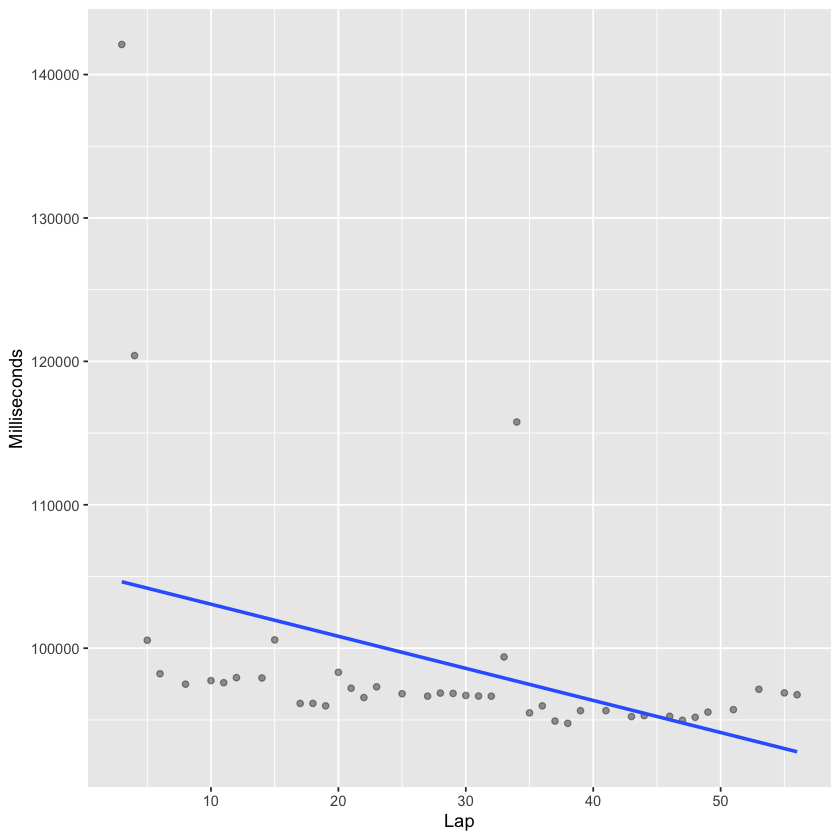

In [7]:
#1. Bahrain 

yt_bahrain <- tsu_laps %>%
                filter(raceId %in% bahrain_race_ID) 

yt_bahrain_clean <- yt_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

yt_bahrain_clean_ID <- yt_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_bahrain_races <- tsu_laps %>%
                    filter(raceId %in% yt_bahrain_clean_ID)

formulaone_split <- initial_split(yt_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1072,49


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



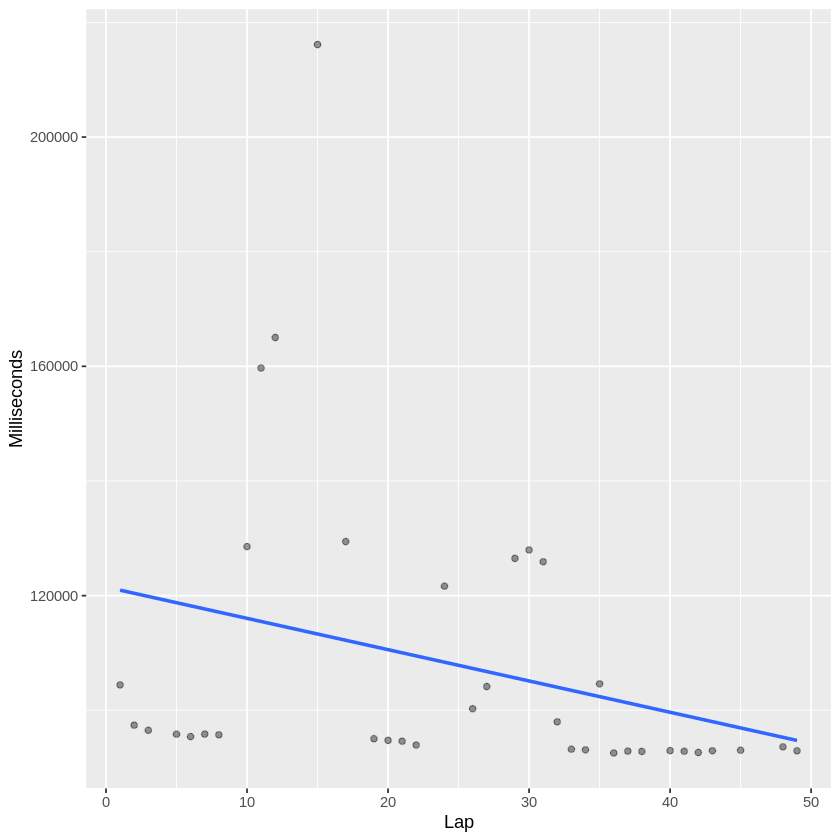

In [87]:
#2. Saudi Arabia

yt_saudi <- tsu_laps %>%
                filter(raceId %in% saudi_race_ID) 

yt_saudi_clean <- yt_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_saudi_clean
yt_saudi_clean_ID <- yt_saudi_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_saudi_races <- tsu_laps %>%
                    filter(raceId %in% yt_saudi_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(yt_saudi_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

In [9]:
#3. Australia

# yt_aus <- tsu_laps %>%
#                 filter(raceId %in% aus_race_ID) 

# yt_aus_clean <- yt_aus %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# yt_aus_clean
# yt_aus_clean_ID <- yt_aus_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_aus_races <- tsu_laps %>%
#                     filter(raceId %in% yt_aus_clean_ID)

# formulaone_split <- initial_split(yt_aus_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression() 

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



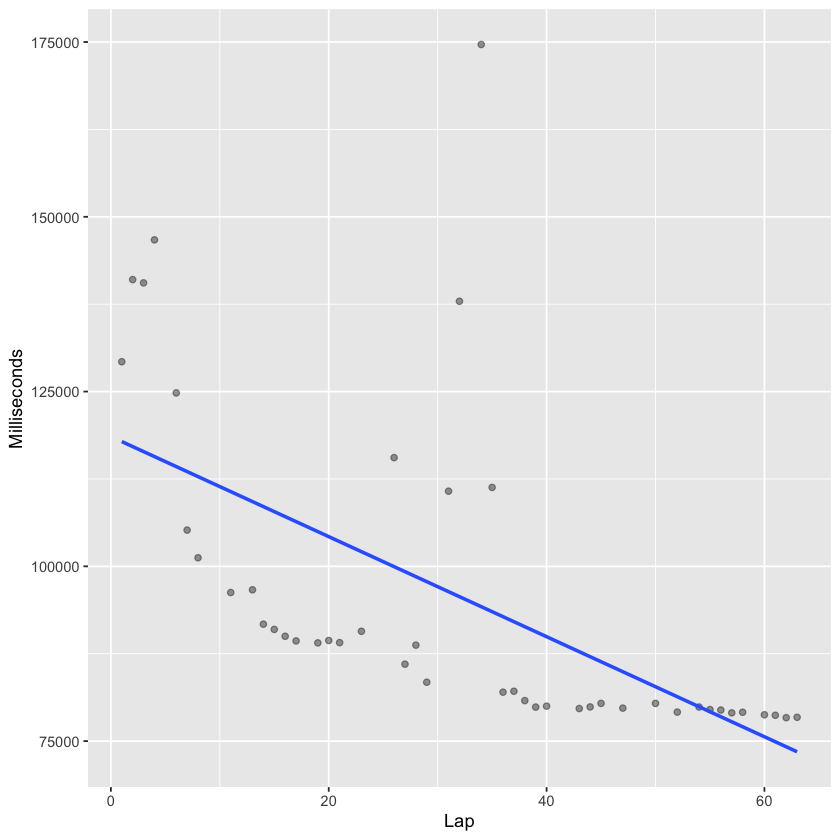

In [23]:
#4. Italy, Imola

yt_imola <- tsu_laps %>%
                filter(raceId %in% imola_race_ID) 

yt_imola_clean <- yt_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_imola_clean_ID <- yt_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_imola_races <- tsu_laps %>%
                    filter(raceId %in% yt_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



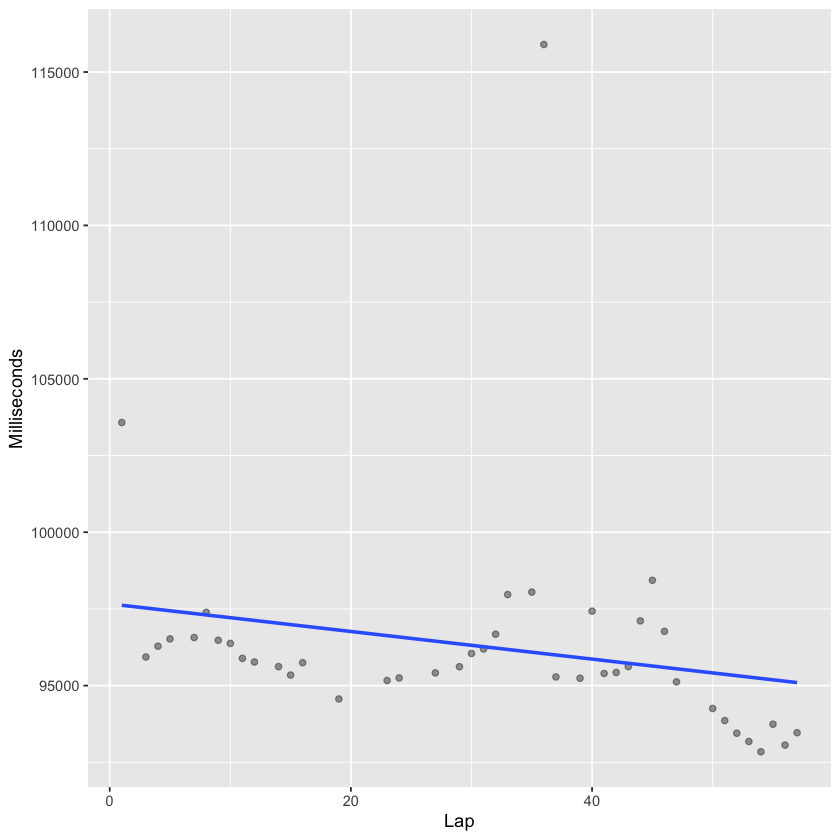

In [27]:
#5. Turkey (Replacing Miami)

yt_turkey <- tsu_laps %>%
                filter(raceId %in% turkey_race_ID) 

yt_turkey_clean <- yt_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_turkey_clean_ID <- yt_turkey_clean %>%
                        pull(raceId)

### SPLITTING DATA

yt_turkey_races <- tsu_laps %>%
                    filter(raceId %in% yt_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds))

formulaone_split <- initial_split(yt_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 0 breaks instead.”
Warning message:
“Too little data to stratify.
* Resampling will be unstratified.”
`geom_smooth()` using formula 'y ~ x'



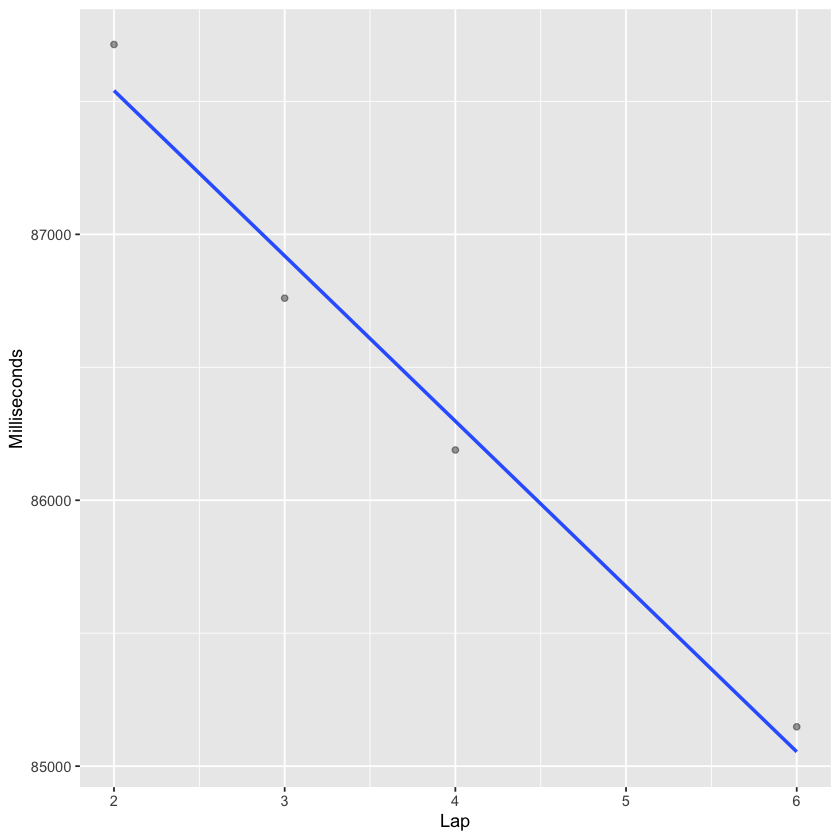

In [29]:
#6. Spain

yt_spain <- tsu_laps %>%
                filter(raceId %in% spain_race_ID) 

yt_spain_clean <- yt_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_spain_clean_ID <- yt_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_spain_races <- tsu_laps %>%
                    filter(raceId %in% yt_spain_clean_ID)

formulaone_split <- initial_split(yt_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1056,77


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



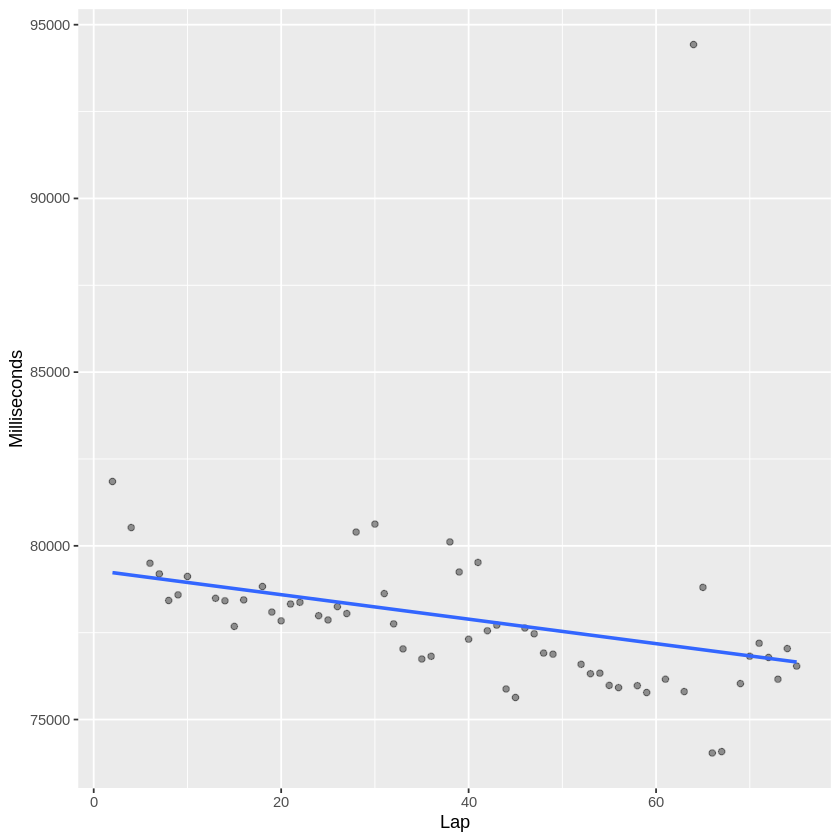

In [91]:
#7. Monaco

yt_monaco <- tsu_laps %>%
                filter(raceId %in% monaco_race_ID) 

yt_monaco_clean <- yt_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_monaco_clean
yt_monaco_clean_ID <- yt_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_monaco_races <- tsu_laps %>%
                    filter(raceId %in% yt_monaco_clean_ID)

formulaone_split <- initial_split(yt_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



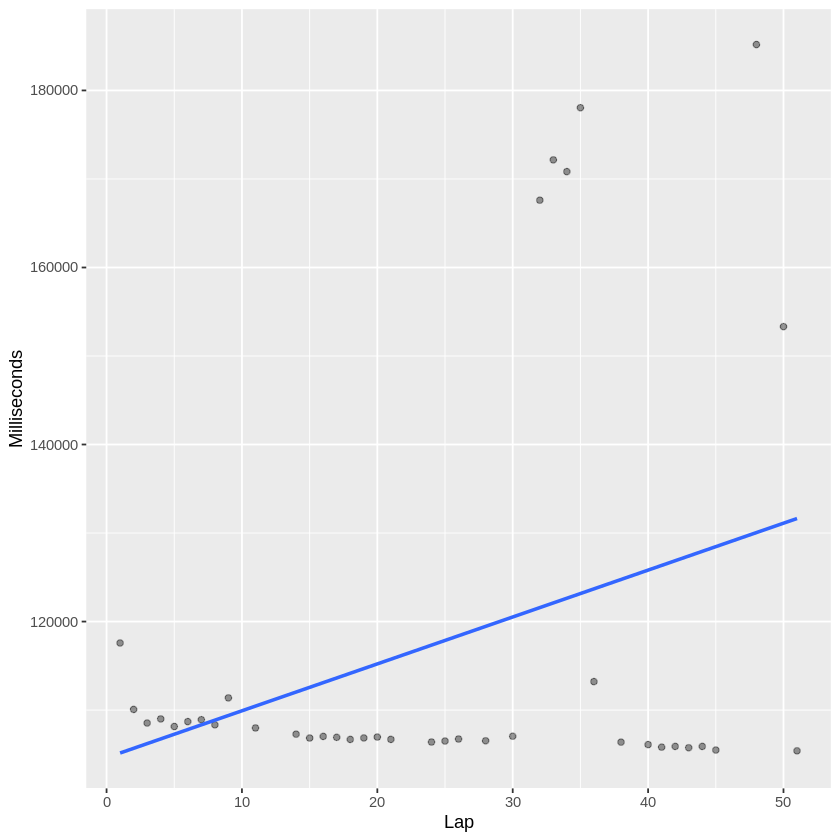

In [92]:
#8. Azerbaijan

yt_azerbaijan <- tsu_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

yt_azerbaijan_clean <- yt_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_azerbaijan_clean
yt_azerbaijan_clean_ID <- yt_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_azerbaijan_races <- tsu_laps %>%
                    filter(raceId %in% yt_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

In [93]:
#9. Canada

# yt_canada <- tsu_laps %>%
#                 filter(raceId %in% canada_race_ID) 

# yt_canada_clean <- yt_canada %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# yt_canada_clean
# yt_canada_clean_ID <- yt_canada_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_canada_races <- tsu_laps %>%
#                     filter(raceId %in% yt_canada_clean_ID)

# formulaone_split <- initial_split(yt_canada_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1061,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



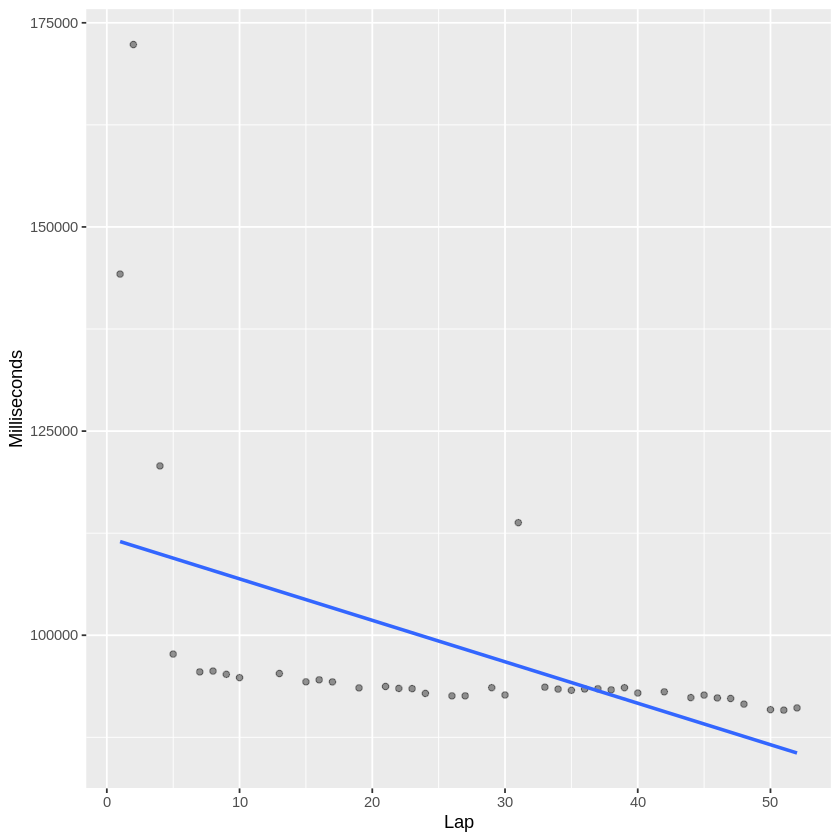

In [94]:
#10. Great Britain

yt_uk <- tsu_laps %>%
                filter(raceId %in% uk_race_ID) 

yt_uk_clean <- yt_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_uk_clean
yt_uk_clean_ID <- yt_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_uk_races <- tsu_laps %>%
                    filter(raceId %in% yt_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:598)

formulaone_split <- initial_split(yt_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1058,70
1060,70


`geom_smooth()` using formula 'y ~ x'



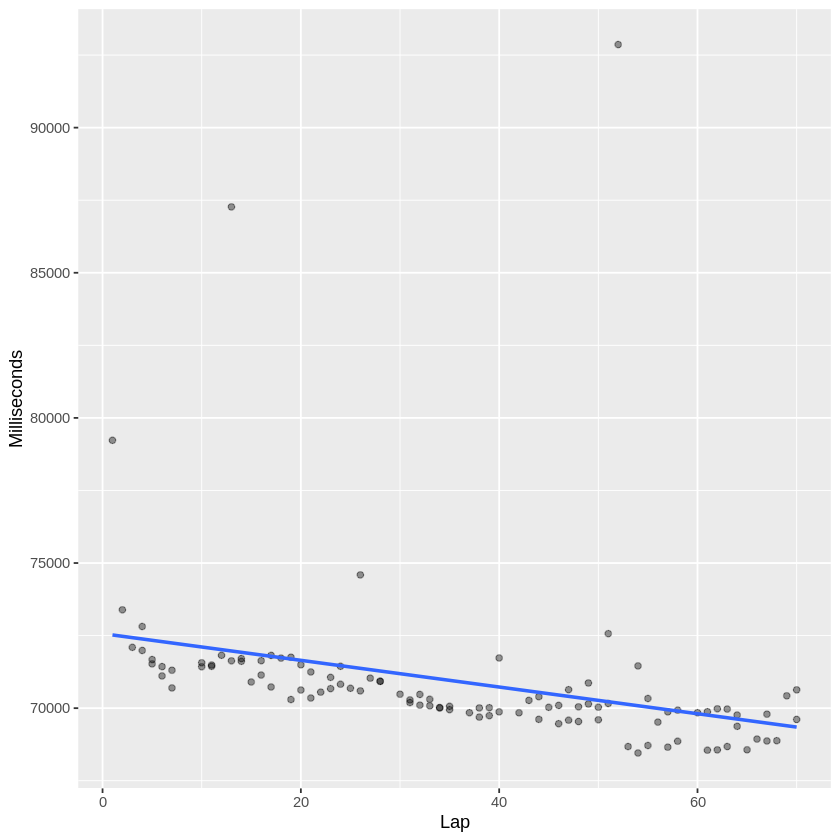

In [109]:
#11. Austria

yt_austria <- tsu_laps %>%
                filter(raceId %in% austria_race_ID) 

yt_austria_clean <- yt_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_austria_clean
yt_austria_clean_ID <- yt_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_austria_races <- tsu_laps %>%
                    filter(raceId %in% yt_austria_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(yt_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



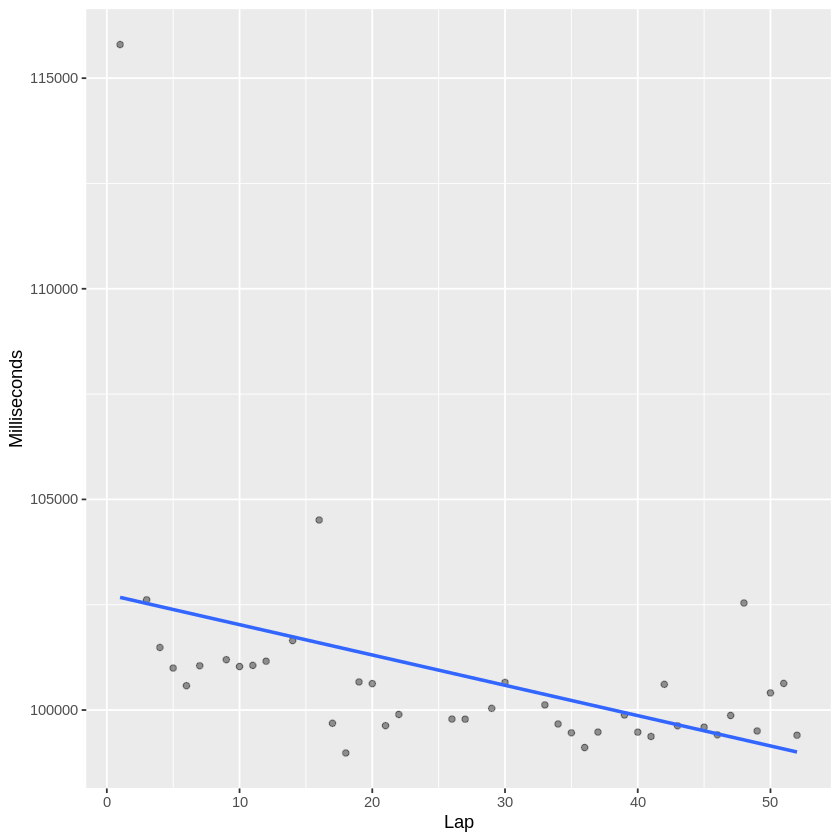

In [96]:
#12. France

yt_france <- tsu_laps %>%
                filter(raceId %in% france_race_ID) 

yt_france_clean <- yt_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_france_clean
yt_france_clean_ID <- yt_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_france_races <- tsu_laps %>%
                    filter(raceId %in% yt_france_clean_ID)

formulaone_split <- initial_split(yt_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1062,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



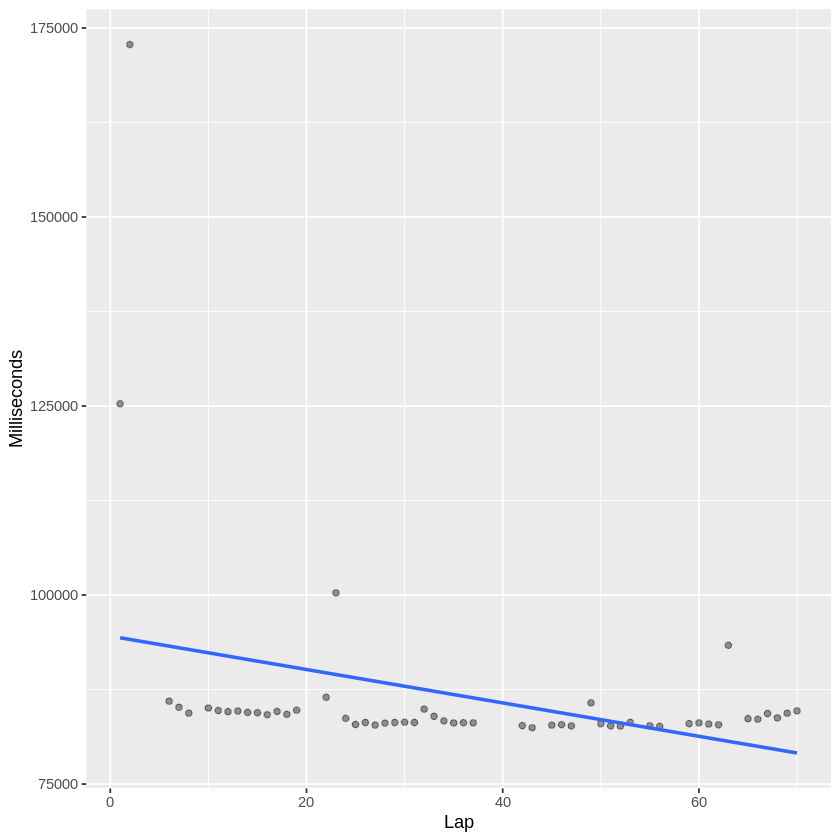

In [97]:
#13. Hungary

yt_hungary <- tsu_laps %>%
                filter(raceId %in% hungary_race_ID) 

yt_hungary_clean <- yt_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
yt_hungary_clean
yt_hungary_clean_ID <- yt_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_hungary_races <- tsu_laps %>%
                    filter(raceId %in% yt_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>% 
                    slice(2:598)

formulaone_split <- initial_split(yt_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

In [98]:
#14. Belgium

# yt_belgium <- tsu_laps %>%
#                 filter(raceId %in% belgium_race_ID) 

# yt_belgium_clean <- yt_belgium %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# yt_belgium_clean
# yt_belgium_clean_ID <- yt_belgium_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_belgium_races <- tsu_laps %>%
#                     filter(raceId %in% yt_belgium_clean_ID)

# formulaone_split <- initial_split(yt_belgium_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,48


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



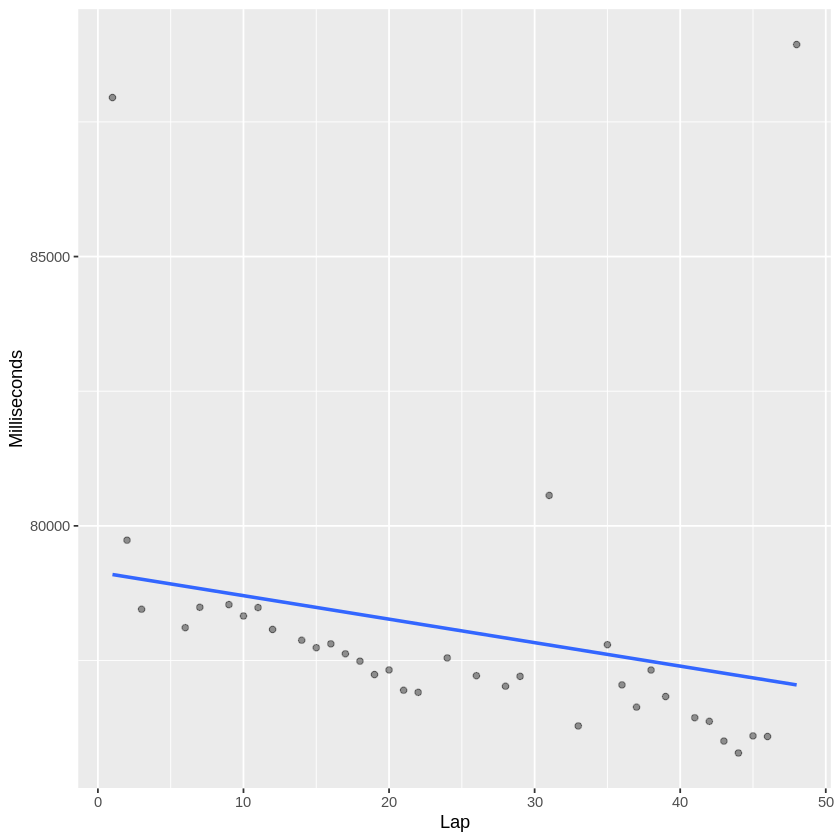

In [99]:
#15. Netherlands

yt_netherlands <- tsu_laps %>%
                filter(raceId %in% netherlands_race_ID) 

yt_netherlands_clean <- yt_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_netherlands_clean
yt_netherlands_clean_ID <- yt_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_netherlands_races <- tsu_laps %>%
                    filter(raceId %in% yt_netherlands_clean_ID)

formulaone_split <- initial_split(yt_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

In [100]:
#16. Italy, Monza

# yt_monza <- tsu_laps %>%
#                 filter(raceId %in% monza_race_ID) 

# yt_monza_clean <- yt_monza %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))
# yt_monza_clean
# yt_monza_clean_ID <- yt_monza_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_monza_races <- tsu_laps %>%
#                     filter(raceId %in% yt_monza_clean_ID)

# formulaone_split <- initial_split(yt_monza_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

In [101]:
#17. Singapore

# yt_singapore <- tsu_laps %>%
#                 filter(raceId %in% singapore_race_ID) 

# yt_singapore_clean <- yt_singapore %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# yt_singapore_clean
# yt_singapore_clean_ID <- yt_singapore_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_singapore_races <- tsu_laps %>%
#                     filter(raceId %in% yt_singapore_clean_ID)

# formulaone_split <- initial_split(yt_singapore_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

In [102]:
#18. Japan

# yt_japan <- tsu_laps %>%
#                 filter(raceId %in% japan_race_ID) 

# yt_japan_clean <- yt_japan %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))

# yt_japan_clean_ID <- yt_japan_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_japan_races <- tsu_laps %>%
#                     filter(raceId %in% yt_japan_clean_ID)

# formulaone_split <- initial_split(yt_japan_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1069,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



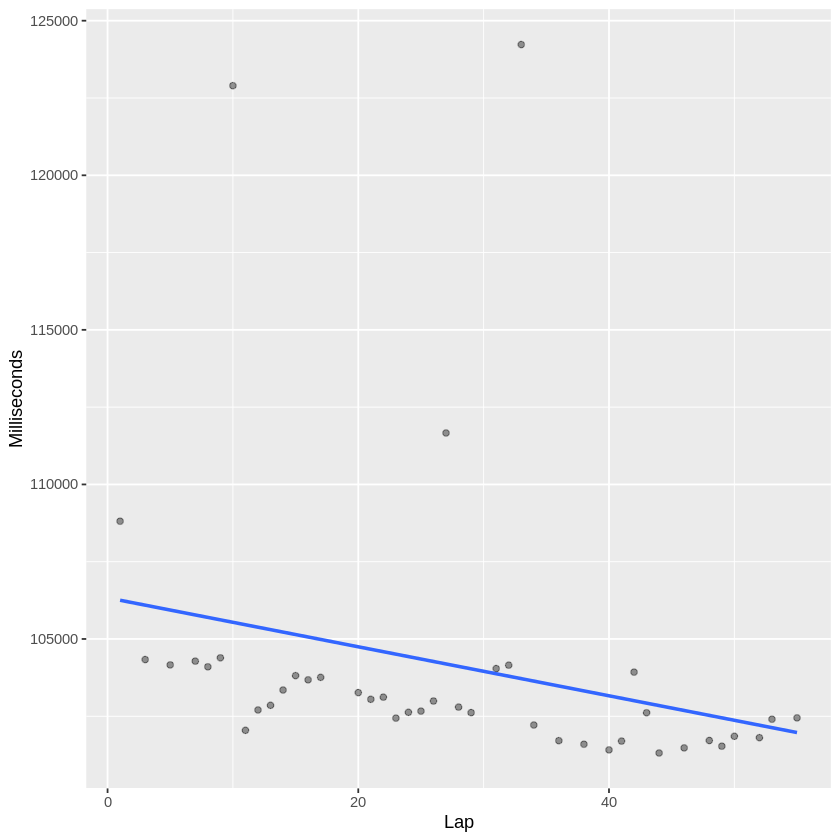

In [103]:
#19. USA, Austin

yt_austin <- tsu_laps %>%
                filter(raceId %in% austin_race_ID) 

yt_austin_clean <- yt_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_austin_clean
yt_austin_clean_ID <- yt_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_austin_races <- tsu_laps %>%
                    filter(raceId %in% yt_austin_clean_ID)

formulaone_split <- initial_split(yt_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

In [104]:
#20. Mexico

# yt_mexico <- tsu_laps %>%
#                 filter(raceId %in% mexico_race_ID) 

# yt_mexico_clean <- yt_mexico %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 

# yt_mexico_clean_ID <- yt_mexico_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_mexico_races <- tsu_laps %>%
#                     filter(raceId %in% yt_mexico_clean_ID)

# formulaone_split <- initial_split(yt_mexico_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1071,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



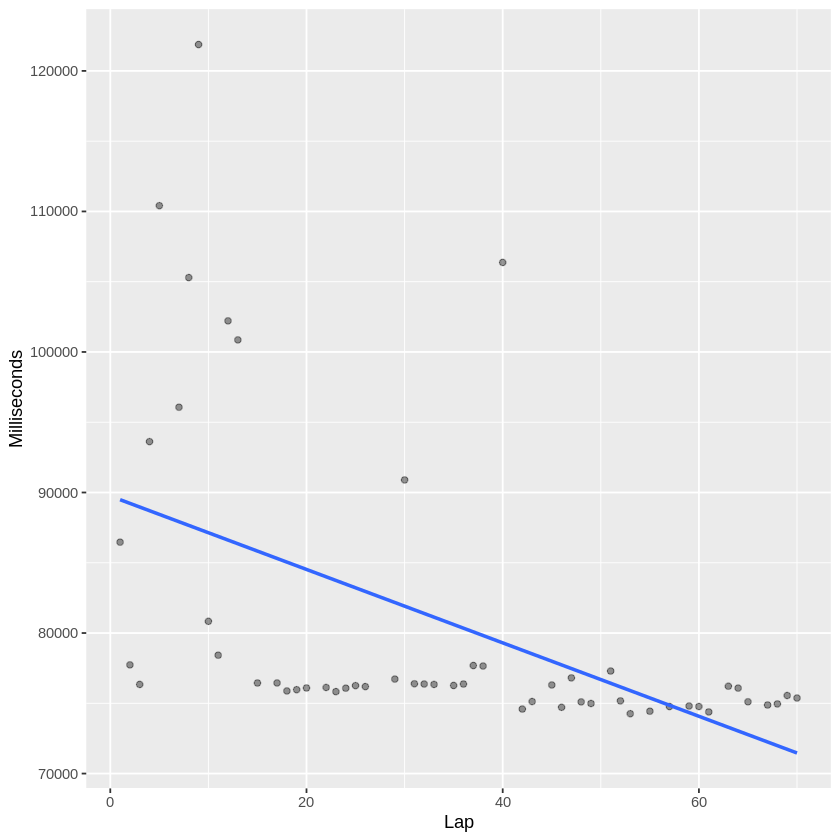

In [105]:
#21. Brazil

yt_brazil <- tsu_laps %>%
                filter(raceId %in% brazil_race_ID) 

yt_brazil_clean <- yt_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_brazil_clean
yt_brazil_clean_ID <- yt_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_brazil_races <- tsu_laps %>%
                    filter(raceId %in% yt_brazil_clean_ID)

formulaone_split <- initial_split(yt_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1073,58


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



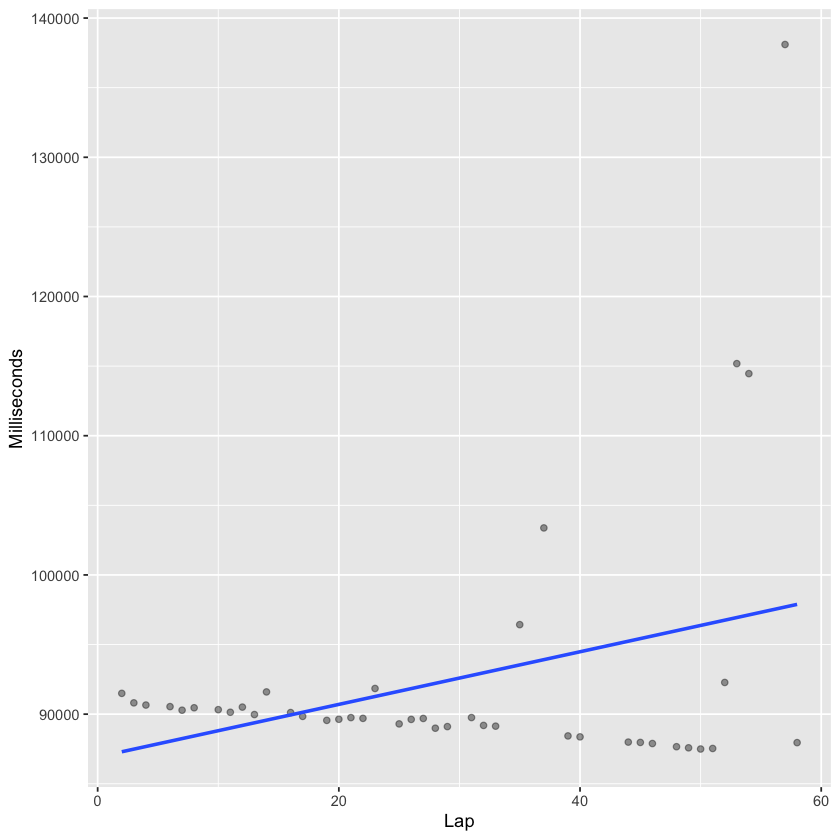

In [12]:
#22. Abu Dhabi

yt_uae <- tsu_laps %>%
                filter(raceId %in% uae_race_ID) 

yt_uae_clean <- yt_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_uae_clean
yt_uae_clean_ID <- yt_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_uae_races <- tsu_laps %>%
                    filter(raceId %in% yt_uae_clean_ID)

formulaone_split <- initial_split(yt_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()